**Prompt**: Implement Kruskal’s algorithm for finding the minimum spanning tree of a weighted graph. For
full credit, you must utilize a union-find data structure, as described in Section 4.6 of the Kleinberg/Tardos
textbook; i.e., as part of this assignment you must read and understand Section 4.6. Please note that
they prescribe several optimizations, and all of these should be present in your implementation as well.
You must also implement a mergesort algorithm.
You can only utilize the following primitive python data structures: python lists, python dictionaries, and
numpy arrays. You can only utilize primitive python and numpy functions, such as sum, multiplication,
division, exponentiation, etc. If you are in doubt, then please ask. Regardless of what operations and
data structures you use, you must conform to the API provided below.

Additional Software Specifications and I/O:
- All code must be written in Python.
- All numeric values should be floats, unless otherwise stated.
- You must use *exactly* the function names described below.
- Code must be delivered as a Python class, and include the methods specified below.
- You can assume graphs will have unique weights, and will be fully-connected.

obj = kruskalClass()
- Input:
- Output: an object instantiated from your class. Your class should have the name
‘kruskalClass’.

T = findMinimumSpanningTree(A)
- Input: ‘A’ is an NxN numpy array representing an adjacency matrix
representation of a graph. If 𝐴 it implies there is an edge between
𝑖𝑗 = 𝑤 > 0
nodes 𝑖 and 𝑗 with weight 𝑤. We will only consider undirected graphs, and
therefore ‘A’ will be an upper right triangular matrix. You can assume no two
edge weights are the same.
- Output: ‘T‘ is an NxN numpy array representing the minimum spanning tree of
‘A’. We will only consider undirected graphs, and therefore ‘T’ should be an
upper right triangular matrix.

b = mergesort(a)
- Input: ‘a’ must be a 1xK numpy array.
- Output: ‘b’ must be a 1xK numpy array with elements in ascending order (i.e.,
lowest value to highest).

u = makeUnionFind(N)
- Input: ‘N’ is the number of nodes in a graph.
- Output: ‘u’ is a 1XN python dictionary, where the keys are numerical labels for
the nodes, and the values are numpy arrays with the 0
th entry being a pointer to a
node in the same dictionary. The numpy arrays can be more than one 1-D if you
want, but they must be numpy arrays, and the 0
th entry must contain pointers to
other nodes that are used in the ‘find’ and ‘union’ functions

s = find(u,v)
- Input: ‘u’ is a union-find data structure. ‘v’ is a numerical index for a graph node.
- Output: ‘s’ is the numerical value corresponding to the label for the set of
connected nodes to which ‘v’ belongs.

u_out = union(u_in,s1,s2)
- Input: ‘u_in’ is a union-find data structure. ‘s1’ and ‘s2’ are numerical values
corresponding to the labels of two groups of graph nodes.
- Output: ‘u_out’ is the same as ‘u-in’, except that the two groups of nodes, ‘s1’
and ‘s2’, have been merged into a single group with a single label.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

------------------------------------------------------------------------------------------

Original Graph:


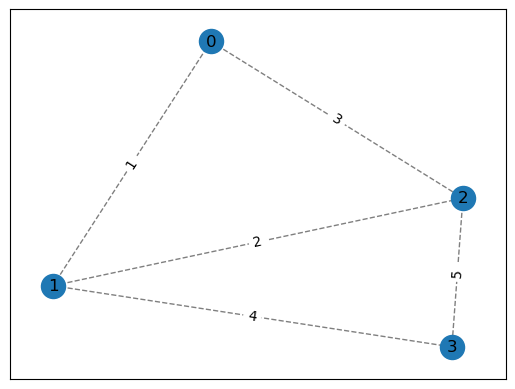

Adding Edge: (0, 1, 1.0)


/tmp/ipykernel_12169/1021631098.py:18: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, alpha=0.8, width=2, edge_color="b")  # Highlighting specific edges


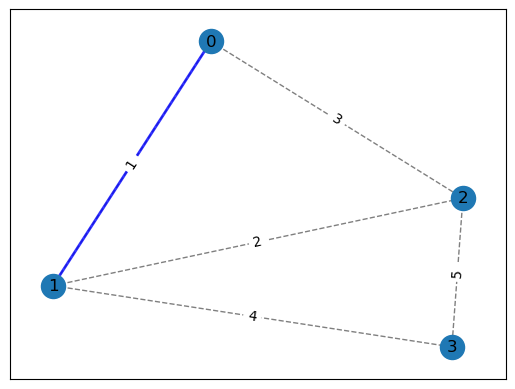

Adding Edge: (1, 2, 2.0)


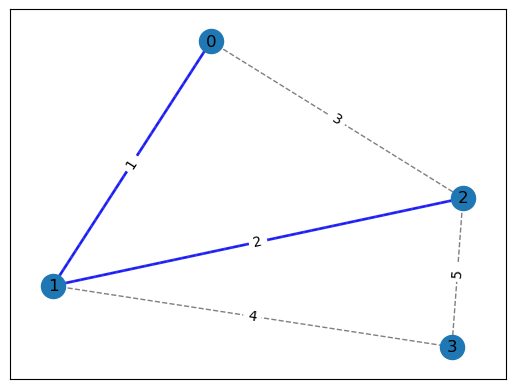

Adding Edge: (1, 3, 4.0)


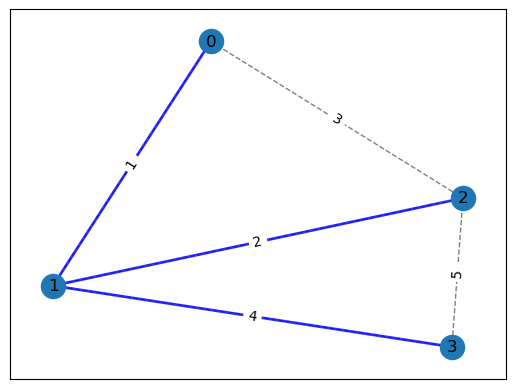

[[0. 1. 0. 0.]
 [0. 0. 2. 4.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[1. 2. 5. 5. 6. 9.]
[3 1 0 4 5 2]


In [7]:
class kruskalClass:
    
    def __init__(self):
        pass  # Skipping initialization for brevity

    def plot_graph(self, edges, n, pos, highlighted_edges=[]):
        """
        Plots a graph given the edges and the number of nodes.
        """
        G = nx.Graph()  # Creating a new graph
        G.add_nodes_from(range(n))  # Adding nodes
        for u, v, w in edges:
            G.add_edge(u, v, weight=w)  # Adding edges with weights
        
        nx.draw_networkx_edges(G, pos, alpha=0.5, style="dashed")  # Drawing edges

        if highlighted_edges:
            nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, alpha=0.8, width=2, edge_color="b")  # Highlighting specific edges

        nx.draw_networkx_nodes(G, pos)  # Drawing nodes
        nx.draw_networkx_labels(G, pos)  # Adding labels to nodes
        edge_labels = {(u, v): w for u, v, w in edges}  # Creating edge labels
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)  # Adding labels to edges

        plt.show()  # Displaying the graph

    def mergesort(self, a):
        """
        Performs the merge sort algorithm on a given numpy array 'a'. Returns
        the sorted array along with the indices of the elements as per their 
        order in the original array.

        - Input: a must be a 1xK numpy array.
        - Output: b must be a 1xK numpy array with elements in ascending order (i.e.,
            lowest value to highest).

        Parameters:
        - a : numpy array
            The input array to be sorted.

        Returns:
        - sorted_array : numpy array
            The array 'a' sorted in ascending order.
        - sorted_inds : numpy array
            The indices of elements in the original array corresponding to the order in sorted_array.
        """
        if len(a) <= 1:
            return a, np.arange(len(a))  # Returning the original array and indices if the length is less than or equal to 1
        
        mid = len(a) // 2  # Calculating the middle index for splitting
        left, left_inds = self.mergesort(a[:mid])  # Sorting the left half
        right, right_inds = self.mergesort(a[mid:])  # Sorting the right half
        right_inds += mid  # Adjusting indices for the right half
        
        sorted_array, sorted_inds = self.merge(left, left_inds, right, right_inds)  # Merging the sorted halves
        return sorted_array, sorted_inds  # Returning the sorted array and indices
    
    def merge(self, left, left_inds, right, right_inds):
        """
        Merges two sorted arrays while maintaining the order. Used as a 
        helper function for the mergesort algorithm.

        Parameters:
        - left, right : numpy arraySkeleton
            The sorted arrays to be merged.
        - left_inds, right_inds : numpy array
            The indices of elements in the original unsorted array.

        Returns:
        - sorted_array : numpy array
            The merged sorted array.
        - sorted_inds : numpy array
            The indices of elements corresponding to the order in sorted_array.
        """
        i = j = 0  # Initializing indices
        sorted_array = np.zeros(len(left) + len(right))  # Creating an array for sorted elements
        sorted_inds = np.zeros(len(left) + len(right), dtype=int)  # Creating an array for indices of sorted elements
        
        # Merging process while both halves have elements
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                sorted_array[i+j] = left[i]  # Adding the smaller element to the sorted array
                sorted_inds[i+j] = left_inds[i]  # Adding the index of the smaller element
                i += 1  # Incrementing the index for the left half
            else:
                sorted_array[i+j] = right[j]  # Adding the smaller element to the sorted array
                sorted_inds[i+j] = right_inds[j]  # Adding the index of the smaller element
                j += 1  # Incrementing the index for the right half
        
        # Adding remaining elements from the left half, if any
        while i < len(left):
            sorted_array[i+j] = left[i]  # Adding element to the sorted array
            sorted_inds[i+j] = left_inds[i]  # Adding the index of the element
            i += 1  # Incrementing the index

        # Adding remaining elements from the right half, if any
        while j < len(right):
            sorted_array[i+j] = right[j]  # Adding element to the sorted array
            sorted_inds[i+j] = right_inds[j]  # Adding the index of the element
            j += 1  # Incrementing the index
        
        return sorted_array, sorted_inds  # Returning the sorted array and indices

    def makeUnionFind(self, N):
        """
        Creates and returns a union-find data structure for N nodes.

        Parameters:
        - N : int
            The total number of nodes.

        Returns:
        - u : dictionary
            The union-find data structure with N nodes.
        """
        u = {}  # Initializing the union-find data structure
        for i in range(N):
            u[i] = np.array([i, 1])  # Each node is its own parent has a count of 1
        return u  # return a union-find data structure with N nodes
    
    def find(self, u, v):
        """
        Finds and returns the representative element or the "parent" of the set 
        to which the element 'v' belongs in the union-find data structure 'u'.

        Parameters:
        - u : dictionary
            The union-find data structure.
        - v : int
            The element whose set representative is to be found.

        Returns:
        - s : int
            The representative element of the set to which 'v' belongs.
        """
        return u[v][0]  # Finding the set of the node v
    
    def union(self, u, s1, s2):
        """
        Unions or merges two distinct sets s1 and s2 in the union-find data 
        structure 'u'. The representative of the merged set becomes the representative 
        of set s1.

        Parameters:
        - u : dictionary
            The union-find data structure.
        - s1, s2 : int
            The representative elements of the two sets to be merged.

        Returns:
        - u : dictionary
            The updated union-find data structure after the union operation.
        """
        # check sizes of s1 and s2 to ensure correct representative
        if u[s1][1] < u[s2][1] or (u[s1][1] == u[s2][1] and s1 > s2): # choose larger set or smaller representative if sizes are equal
            s1, s2 = s2, s1
        for key in u:
            if u[key][0] == s2:
                u[key][0] = s1  # Merging the sets
        u[s1][1] += u[s2][1] # Updating the size of the merged set
        return u  # Returning the updated union-find structure
    
    def findMinimumSpanningTree(self, A):
        """
        Implements Kruskal's algorithm to find and return the minimum 
        spanning tree of a graph represented by the adjacency matrix 'A'.

        Parameters:
        - A : numpy array
            The adjacency matrix representing the graph.

        Returns:
        - T : numpy array
            The adjacency matrix representing the minimum spanning tree.
        """
        N = len(A)  # Getting the number of nodes
        # Behold, the power of list comprehension!
        edges = [(A[i][j], i, j) for i in range(N) for j in range(i+1, N) if A[i][j] > 0]  # Extracting edges and weights from the adjacency matrix
        edge_weights = np.array([x[0] for x in edges])  # Getting the weights of edges
        sorted_edge_weights, sorted_inds = self.mergesort(edge_weights)  # Sorting the edges based on weights
        sorted_edges = [edges[i] for i in sorted_inds]  # Getting the sorted edges
        
        uf = self.makeUnionFind(N)  # Creating a union-find data structure
        T = np.zeros((N, N))  # Creating an array for the minimum spanning tree
        
        for edge in sorted_edges:
            weight, node1, node2 = edge  # Extracting weight and nodes from the edge
            set1, set2 = self.find(uf, node1), self.find(uf, node2)  # Finding the sets of the nodes
            
            if set1 != set2:
                T[node1][node2] = weight  # Adding the edge to the minimum spanning tree if it does not form a cycle
                uf = self.union(uf, set1, set2)  # Merging the sets
        
        return T  # Returning the minimum spanning tree
    
    def plotMinimumSpanningTree(self, A):
        """
        Plots the minimum spanning tree of a graph represented by the adjacency matrix 'A'.
        """
        T = self.findMinimumSpanningTree(A)
        N = len(A)
        edges = [(i, j, A[i][j]) for i in range(N) for j in range(i+1, N) if A[i][j] > 0]
        mst_edges = [(i, j, T[i][j]) for i in range(N) for j in range(i+1, N) if T[i][j] > 0]
        
        G = nx.Graph()
        G.add_nodes_from(range(N))
        for u, v, w in edges:
            G.add_edge(u, v, weight=w)
        pos = nx.spring_layout(G)  # Compute positions only once
        
        print("Original Graph:")
        self.plot_graph(edges, N, pos)
        
        highlighted = []
        for edge in mst_edges:
            highlighted.append(edge)
            print(f"Adding Edge: {edge}")
            self.plot_graph(edges, N, pos, highlighted)


# Testing
obj = kruskalClass()
A = np.array([[0, 1, 3, 0], [0, 0, 2, 4], [0, 0, 0, 5], [0, 0, 0, 0]])
obj.plotMinimumSpanningTree(A)

# Testing
obj = kruskalClass()
A = np.array([[0, 1, 3, 0], [0, 0, 2, 4], [0, 0, 0, 5], [0, 0, 0, 0]])
T = obj.findMinimumSpanningTree(A)
print(T)

a = np.array([5, 2, 9, 1, 5, 6])
b, inds = obj.mergesort(a)
print(b)
print(inds)

In [6]:
#Instantiate an object for your class.
obj = kruskalClass()
# Create a test matrix
A = np.array([[0, 8, 0, 3],
 [0, 0, 2, 5],
 [0, 0, 0, 6],
 [0, 0, 0, 0]])
#Use code to generate a MST
T = obj.findMinimumSpanningTree(A)
#Print the MST
print(T)
print(type(T))

n = 5; 
u = obj.makeUnionFind(n)
print(u)

# If we run the 'find' it returns the index 
# that was provided as input
s1 = obj.find(u,2)
print(s1)
s2 = obj.find(u,4)
print(s2)

# Now we can try doing some union operations
#Combine the sets for nodes 0 and 1
u1 = obj.union(u,obj.find(u,0),obj.find(u,1))
print(obj.find(u1,0))
print(u1)
u2 = obj.union(u,obj.find(u1,0),obj.find(u1,2))
print(u2)

#Notice that the set '2' takes the name of the larger set, 
# which is composed of {0,1} from the first merging operation.  
# When doing the second union operation, your code should always give node '2' 
# the name obj.find(0) (which may be '1' or '0' depending upon your implementation) 
# because it is the larger set 

[[0. 0. 0. 3.]
 [0. 0. 2. 5.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<class 'numpy.ndarray'>
{0: array([0, 1]), 1: array([1, 1]), 2: array([2, 1]), 3: array([3, 1]), 4: array([4, 1])}
2
4
0
{0: array([0, 2]), 1: array([0, 1]), 2: array([2, 1]), 3: array([3, 1]), 4: array([4, 1])}
{0: array([0, 3]), 1: array([0, 1]), 2: array([0, 1]), 3: array([3, 1]), 4: array([4, 1])}
